## Experiment 0
## Digital Signal Processing Lab

#### Importing libraries and modules

In [1]:
import numpy as np
import scipy
import math
import matplotlib
import IPython

import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams


In [2]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 8})

#### Reading Files

In [3]:
def read_file(file_name):
    #returns a list
    with open(file_name,'r') as f:
        file = f.readlines()
    
    data_list = []
    
    for data in file:
        data_list.append(float(data))
    
    return data_list

In [4]:
ecg_data = read_file('Experiment-0\ECG_data.txt')
print("Ecg_data samples:" + str(len(ecg_data)))

rainfallIndia_Jan = read_file('Experiment-0\RainfallIndia_Jan.txt')
print("Number of Rain fall data samples of January :" +  str(len(rainfallIndia_Jan)))

rainfallIndia_July = read_file('Experiment-0\RainfallIndia_July.txt')
print("Number of Rain fall data samples of July:" + str(len(rainfallIndia_July)))

Ecg_data samples:6884
Number of Rain fall data samples of January :640
Number of Rain fall data samples of July:640


#### Problem 1

In [5]:
# Generate signals
t = np.linspace(0,1,num = 1001)
pi = math.pi


y1 = np.sin(20*pi*t)
y2 = np.cos(5*pi*t)
y3 = np.exp(-2*t)
y4 = np.multiply(np.exp(-0.5*t),np.sin(30*pi*t))


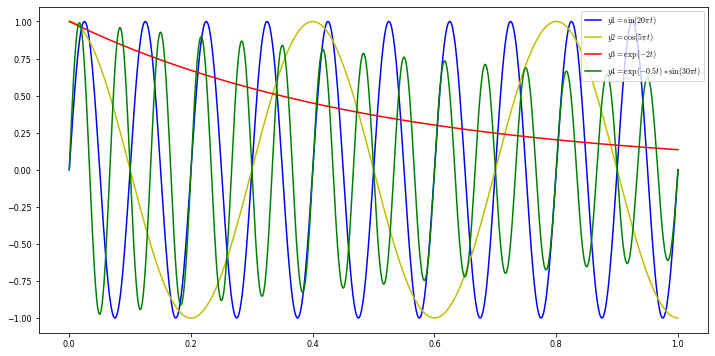

In [6]:
plt.plot(t,y1,'b',label='$y1 =\sin{(20 \pi t)}$')

plt.plot(t,y2,'y',label='$y2 =\cos{(5\pi t)}$' )

plt.plot(t,y3,'r',label='$y3 = \exp{(-2t)}$')

plt.plot(t,y4,'g',label='$y4 = \exp{(-0.5t)} * \sin{(30\pi t)}$')

plt.legend()

 #### Problem 2

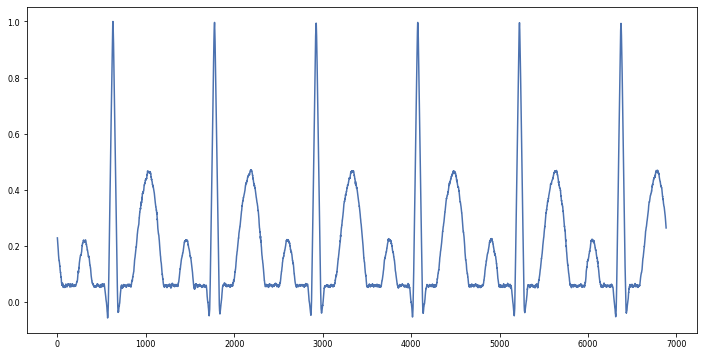

In [7]:
plt.plot(ecg_data)

(array([144., 334., 100.,  23.,  20.,   8.,   7.,   1.,   2.,   1.]),
 array([  11.6 ,  192.53,  373.46,  554.39,  735.32,  916.25, 1097.18,
        1278.11, 1459.04, 1639.97, 1820.9 ]),
 <BarContainer object of 10 artists>)

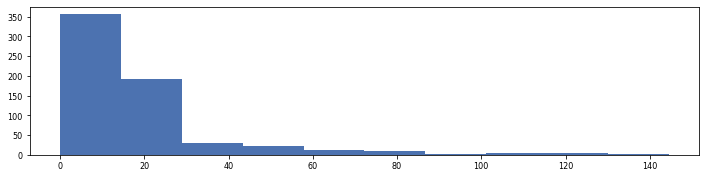

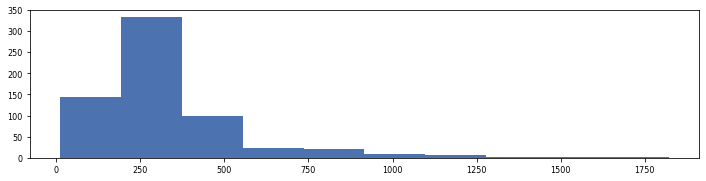

In [8]:
plt.subplot(2,1,1)
plt.hist(rainfallIndia_Jan)
plt.figure()
plt.subplot(2,1,2)
plt.hist(rainfallIndia_July)


In [9]:
mean_Jan = np.mean(rainfallIndia_Jan)
std_Jan = np.std(rainfallIndia_Jan)
print("The mean and standard deviation of rainfall in January are {0:.4f} and {1:.4f}.".format(mean_Jan,std_Jan))

mean_July = np.mean(rainfallIndia_July)
std_July = np.std(rainfallIndia_July)
print("The mean and standard deviation of rainfall in July are {0:.4f} and {1:.4f}.".format(mean_July,std_July))

The mean and standard deviation of rainfall in January are 18.3513 and 21.0826.
The mean and standard deviation of rainfall in July are 326.0936 and 221.3594.


In [10]:
Fs, s = wavfile.read('Experiment-0\Track001.wav')
print('Sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(s, rate=Fs)

Sampling rate: 44100Hz


#### Problem 3

In [11]:
Fs, s = wavfile.read('Experiment-0\speech.wav')
print('Sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(s, rate=Fs)

Sampling rate: 16000Hz


In [12]:
def plot_signal(x, xaxis_label=None, yaxis_label=None, save=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
    
    return

In [13]:
def multiply_signals(x, f, Fs):
    w = 2*pi*(float(f) / Fs)
    return np.multiply(x, np.cos(w * np.arange(0,len(x))))

In [14]:
y = multiply_signals(s, 500, Fs)
IPython.display.Audio(y, rate=Fs)

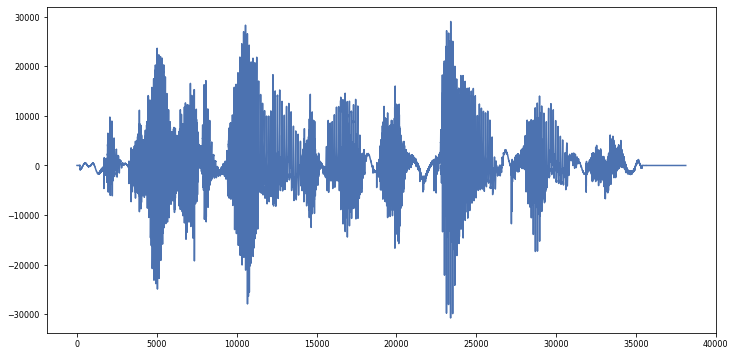

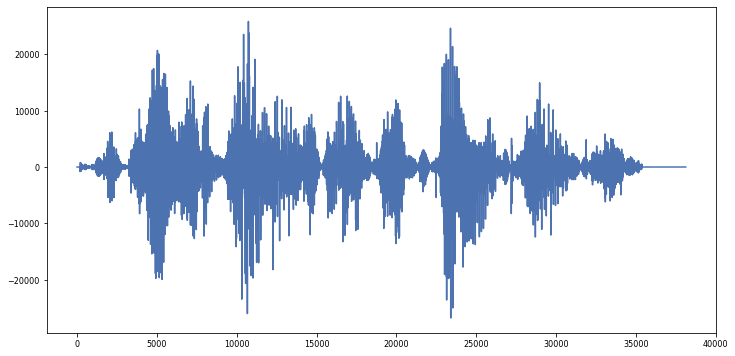

In [15]:
plot_signal(s)
plt.figure()
plot_signal(y)

No, they sound different

#### Problem 4

In [16]:
#Frequencies in hertz
C4 = 261.63
D4 = 293.66
E4 = 329.63
F4 = 349.23
G4 = 392.00
A4 = 440.00
B4 = 493.88
C5 = 523.25

C_major_scale = [C4,D4,E4,F4,G4,A4,B4,C5]

In [17]:
def create_notes(f):
    t = np.linspace(0,1,44101)
    y = np.sin(np.multiply(2 * pi * f, t))
    
    return y

In [18]:
Do,Re,Mi,Fa,So,La,Ti,octave_Do = (create_notes(C_major_scale[i]) for i in range(8))
print(type(Do))

<class 'numpy.ndarray'>


In [19]:
track1 = np.append(Do,Re,axis = 0)
track1 = np.append(track1, Mi, axis = 0)
track1 = np.append(track1, Fa, axis = 0)
track1 = np.append(track1, So, axis = 0)
track1 = np.append(track1, La, axis = 0)
track1 = np.append(track1, Ti, axis = 0)
track1 = np.append(track1, octave_Do, axis = 0)

IPython.display.Audio(track1,rate = 44100)

In [20]:
#Saving the audio file
wavfile.write('C_major.wav', 44100, track1)
#Not working, DOwnloading the above audio works